# Download the dataset

In [4]:
import os
from zipfile import ZipFile
PATH_TO_ZIP = os.path.join("..", "dataset")
PATH_TO_CSV = os.path.join("..", "dataset")
with ZipFile(os.path.join(PATH_TO_ZIP, "archive.zip"), "r") as z_obj:
    z_obj.extractall(PATH_TO_CSV)

In [5]:
import pandas as pd
spam_ham_df = pd.read_csv(os.path.join(PATH_TO_CSV, "spam_or_not_spam.csv"))

# Exploratory Data Analysis

## Quick Glance

In [6]:
spam_ham_df.head(5) # 0 is ham; 1 is spam

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [7]:
spam_ham_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


## Check for null values

In [8]:
spam_ham_df.isnull()

,email,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2995,False,False
2996,False,False
2997,False,False
2998,False,False


In [9]:
null_mask = spam_ham_df.isnull()
rows_with_nulls = spam_ham_df[null_mask.any(axis=1)]
rows_with_nulls

,email,label
2966,NaN,1


In [10]:
# remove the row with null value for email
spam_ham_df = spam_ham_df.dropna()
spam_ham_df.reset_index(inplace=True)

In [11]:
spam_ham_df.isnull().sum()

index    0
email    0
label    0
dtype: int64

## Distribution of Labels

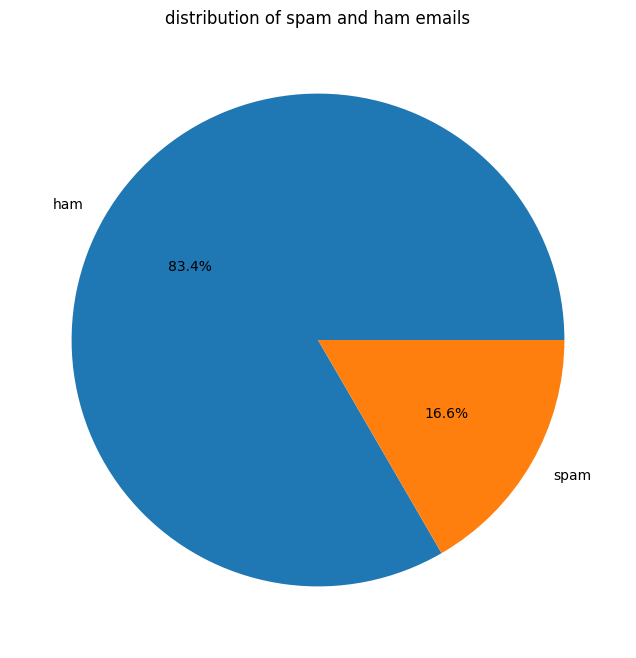

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.pie(spam_ham_df["label"].value_counts(), labels=["spam" if i == 1 else "ham" for i in spam_ham_df["label"].value_counts().index], autopct="%1.1f%%")
plt.title("distribution of spam and ham emails")
plt.show()

In [13]:
spam_ham_df["label"].value_counts().index

Index([0, 1], dtype='int64', name='label')

## Text Data Exploration

In [15]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")
from nltk.tokenize import word_tokenize, sent_tokenize

spam_ham_df.loc[:, ('num_characters')] = spam_ham_df['email'].apply(len)
spam_ham_df.loc[:, ("num_words")] = spam_ham_df["email"].apply(word_tokenize).apply(len)
spam_ham_df.loc[:, ("num_sentences")] = spam_ham_df["email"].apply(sent_tokenize).apply(len)
spam_ham_df = spam_ham_df.drop("index", axis=1)
spam_ham_df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\panth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\panth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,email,label,num_characters,num_words,num_sentences
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522,257,1
1,martin a posted tassos papadopoulos the greek ...,0,643,113,1
2,man threatens explosion in moscow thursday aug...,0,1509,256,1
3,klez the virus that won t die already the most...,0,1015,169,1
4,in adding cream to spaghetti carbonara which ...,0,771,144,1
...,...,...,...,...,...
2994,abc s good morning america ranks it the NUMBE...,1,561,96,1
2995,hyperlink hyperlink hyperlink let mortgage le...,1,468,79,1
2996,thank you for shopping with us gifts for all ...,1,864,154,1
2997,the famous ebay marketing e course learn to s...,1,4129,747,1


In [16]:
spam_ham_df.groupby("label")["num_characters"].describe()

# Inference - spam emails are longer than ham emails

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,2500.0,1233.672000,3101.999287,5.0,360.0,719.0,1280.25,82994.0
1,499.0,2313.669339,9817.766265,1.0,525.0,956.0,1941.00,200408.0


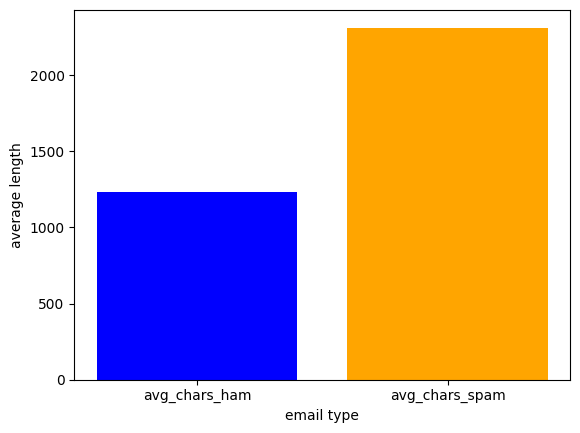

In [17]:
# Average length of emails
avg_chars_spam = spam_ham_df[spam_ham_df["label"] == 1]["num_characters"].mean()
avg_chars_ham = spam_ham_df[spam_ham_df["label"] == 0]["num_characters"].mean()

plt.bar(["avg_chars_ham", "avg_chars_spam"], [avg_chars_ham, avg_chars_spam], color=["blue", "orange"])
plt.xlabel("email type")
plt.ylabel("average length")
plt.show()

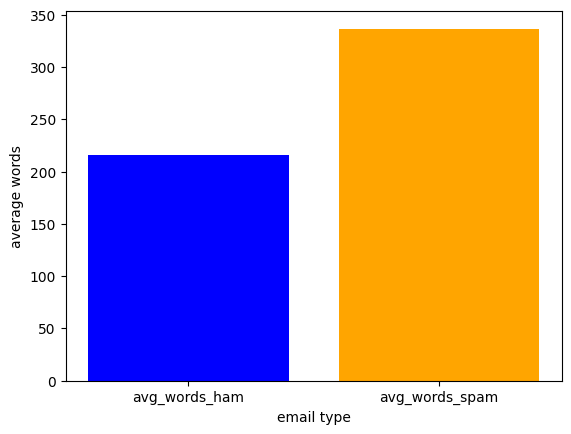

In [18]:
# Average words of emails
avg_words_spam = spam_ham_df[spam_ham_df["label"] == 1]["num_words"].mean()
avg_words_ham = spam_ham_df[spam_ham_df["label"] == 0]["num_words"].mean()

plt.bar(["avg_words_ham", "avg_words_spam"], [avg_words_ham, avg_words_spam], color=["blue", "orange"])
plt.xlabel("email type")
plt.ylabel("average words")
plt.show()

In [19]:
# Correlation between length of email and its type
corr = spam_ham_df["num_characters"].corr((spam_ham_df["label"] == 1).astype(int))
print("Correlation between email length and spam classification", corr)

# inference - correlation is positive but not strong

Correlation between email length and spam classification 0.08178746502103873


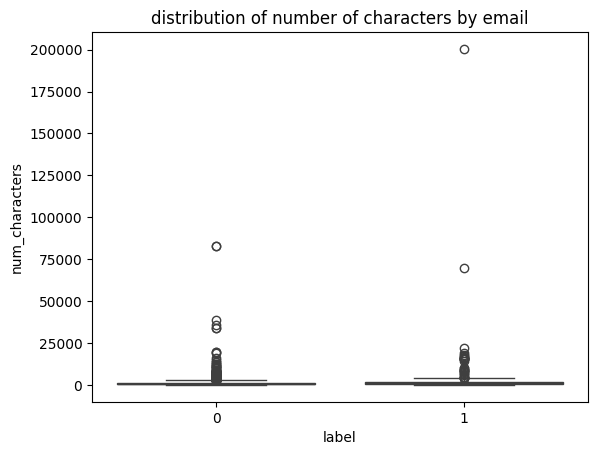

In [20]:
import seaborn as sns
sns.boxplot(x="label", y= "num_characters", data=spam_ham_df)
plt.title("distribution of number of characters by email")
plt.show()

# We have some outliers

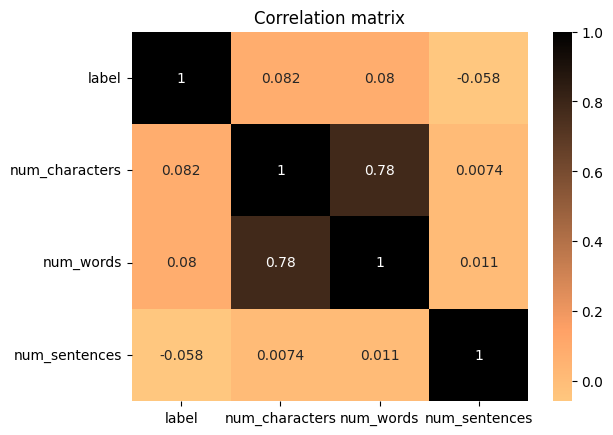

In [21]:
# Correlation matrix
corr_mat = spam_ham_df.corr(numeric_only=True)

sns.heatmap(corr_mat, cmap="copper_r", annot=True)
plt.title("Correlation matrix")
plt.show()

# Data Preprocessing

## Data Cleaning

In [22]:
spam_ham_df_pre = spam_ham_df

In [24]:
from scipy import stats
import numpy as np

# From EDA, we found that the some emails are very long (outliers), so we're gonna remove such outliers
def remove_outliers(df, col, threshold):
    df = df[df[col] <= threshold]
    return df

def remove_outliers_z_score(df, col, z_threshold):
    df["z"] = np.abs(stats.zscore(df[col]))
    df = df[df["z"] <= z_threshold]
    return df

In [25]:
spam_ham_df_pre = remove_outliers(spam_ham_df_pre, "num_characters", 2100)

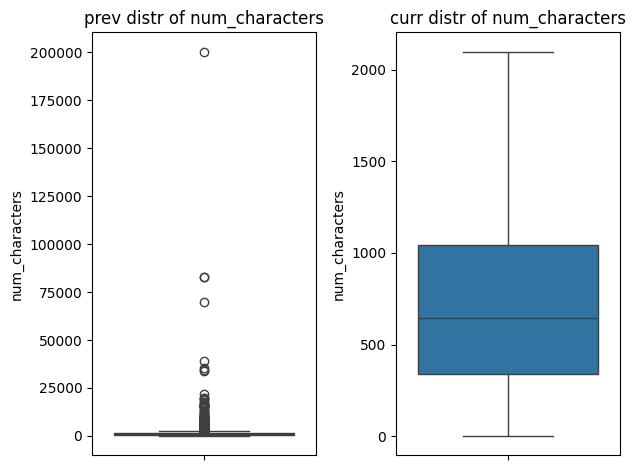

In [26]:
fig, ax = plt.subplots(1, 2)
ax = ax.flatten()
sns.boxplot(spam_ham_df["num_characters"], ax=ax[0])
ax[0].set_title("prev distr of num_characters")

sns.boxplot(spam_ham_df_pre["num_characters"], ax=ax[1])
ax[1].set_title("curr distr of num_characters")
plt.tight_layout()
plt.show()

## Feature Selection

In [27]:
# Drop num_sentences
spam_ham_df_pre = spam_ham_df_pre.drop("num_sentences", axis=1)

## Feature Engineering

In [28]:
import re
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

# Convert to lower case
spam_ham_df_pre["transformed_text"] = spam_ham_df_pre["email"].str.lower()

# Tokenize with words
spam_ham_df_pre["transformed_text"] = spam_ham_df_pre["transformed_text"].apply(word_tokenize)

# Remove special characters
spam_ham_df["transformed_text"] = spam_ham_df_pre["transformed_text"].apply(lambda x: [re.sub('[^a-zA-Z0-9]+', '', word) for word in x])

# Remove stop words and punctuation
stop_words = set(stopwords.words("english"))
punctuations = string.punctuation
spam_ham_df_pre["transformed_text"] = spam_ham_df_pre["transformed_text"].apply(lambda x: [word for word in x if word not in stop_words and word not in punctuations])

# Reduce words to their base form (stemming)
ps = PorterStemmer()
spam_ham_df_pre["transformed_text"] = spam_ham_df_pre["transformed_text"].apply(lambda x: [ps.stem(word) for word in x])

# Convert preprocessed data back to string
spam_ham_df_pre["transformed_text"] = spam_ham_df_pre["transformed_text"].apply(lambda x: " ".join(x))

## Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
spam_ham_df_pre["num_words"] = std_scaler.fit_transform(spam_ham_df_pre["num_words"].values.reshape(-1,1))
spam_ham_df_pre["num_characters"] = std_scaler.fit_transform(spam_ham_df_pre["num_characters"].values.reshape(-1,1))
spam_ham_df_pre

,email,label,num_characters,num_words,transformed_text
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1.607174,1.460934,date wed number aug number number number numbe...
1,martin a posted tassos papadopoulos the greek ...,0,-0.191113,-0.189134,martin post tasso papadopoulo greek sculptor b...
2,man threatens explosion in moscow thursday aug...,0,1.580578,1.449475,man threaten explos moscow thursday august num...
3,klez the virus that won t die already the most...,0,0.569937,0.452559,klez viru die alreadi prolif viru ever klez co...
4,in adding cream to spaghetti carbonara which ...,0,0.070754,0.166089,ad cream spaghetti carbonara effect pasta make...
...,...,...,...,...,...
2991,wealth without risk discover the best kept se...,1,1.500791,1.380722,wealth without risk discov best kept secret am...
2994,abc s good morning america ranks it the NUMBE...,1,-0.358871,-0.383934,abc good morn america rank number christma toy...
2995,hyperlink hyperlink hyperlink let mortgage le...,1,-0.549134,-0.578734,hyperlink hyperlink hyperlink let mortgag lend...
2996,thank you for shopping with us gifts for all ...,1,0.261016,0.280677,thank shop us gift occas free gift number numb...


# Model Shortlisting

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(spam_ham_df_pre["email"]).toarray()
y = spam_ham_df_pre["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# train svc
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)


In [32]:
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
acc_score = accuracy_score(y_test, y_pred)
cf_mat = confusion_matrix(y_test, y_pred)

print(f"rmse: {rmse}\naccuracy score: {acc_score}")
print(f"confusion matrix:\n{cf_mat}")

rmse: 0.12391564216175795
accuracy score: 0.9846449136276392
confusion matrix:
[[445   0]
 [  8  68]]


Verification with example 

In [37]:
# Example non-spam email 
x1 = "xvid NUMBER is a project to make gpl divx codecs sigma designs NUMBER is a company looking to put out hardware to playback amongst other things divx files problem is sigma is using xvids gpled code in ways not very gpl..."

# Vectorizing the new input
x1_vectorized = tfidf.transform([x1])  # Transform the input text

# Convert sparse matrix to dense array for SVC prediction
x1_dense = x1_vectorized.toarray()

# Make the prediction
y1_pred = svc_clf.predict(x1_dense)  # Use the dense array for prediction

# Output the prediction
if y1_pred[0] == 1:
    print("The email is spam")
else:
    print("The email is not spam")



The email is not spam


In [38]:
# Example spam email 
x2 = "as seen on nbc cbs cnn and even oprah the health discovery that actually reverses aging while burning fat without dieting or exercise this proven discovery has even been reported on by the new england journal of medicine forget aging and dieting forever and it s guaranteed click here URL would you like to lose weight while you sleep no dieting no hunger pains no cravings no strenuous exercise change your life forever NUMBER guaranteed NUMBER body fat loss NUMBER improvement NUMBER wrinkle reduction NUMBER improvement URL level NUMBER improvement NUMBER muscle strength NUMBER improvement NUMBER sexual potency NUMBER improvement NUMBER emotional stability NUMBER improvement NUMBER memory NUMBER improvement you are receiving this email as a subscriber to the opt in america mailing list to unsubscribe from future offers just click here mailto affiliateoptout URL"

# Vectorizing the new input
x2_vectorized = tfidf.transform([x2])  # Transform the input text

# Convert sparse matrix to dense array for SVC prediction
x2_dense = x2_vectorized.toarray()

# Make the prediction
y2_pred = svc_clf.predict(x2_dense)  # Use the dense array for prediction

# Output the prediction
if y2_pred[0] == 1:  # Assuming 1 indicates spam
    print("The email is spam")
else:
    print("The email is not spam")


The email is spam
